# Linear Regression

We have "m" number of data, to train our model with.

For i_th data point, we show the cordinator of the data with: $x^{(i)}$ and $y^{(i)}$

Our function is linear and we define it as:
$$ f_{w,b}(x^{(i)}) = w * x^{(i)} + b $$

Cost function is square of variance which is equal to:
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Note: the reason the cost function is divided by two is that, later when we take derivative of the cost function, we get a simpler function (without an extra 2). 

Now we start from an initia w and b, and using this formula we find our next w, b. We continue doing it for number of times (for example 1,000 times). $\alpha$ is our step length that we take each time. The lower the $\alpha$ the more accurate step we take, but we need to take more steps to get to the ideal result. 


$$ w = w - \alpha \frac{\partial J(w,b)}{\partial w} $$
$$ b = b - \alpha \frac{\partial J(w,b)}{\partial b} $$


Now we need to find the partial derivatives. 

For w:
$$ \frac{\partial J}{\partial w} = \frac{\partial}{\partial w} (\frac{1}{2m} \sum_{i=1}^{m} ((w x^{(i)} + b - y^{(i)}) ^ 2)$$

$$\Rightarrow \frac{\partial J}{\partial w} = \frac {1}{m} \sum_{i=1}^{m} ((w x^{(i)} + b - y^{(i)}) x^{(i)})$$

Using the same method for b we get:

$$\Rightarrow \frac{\partial J}{\partial b} = \frac {1}{m} \sum_{i=1}^{m}(w x^{(i)} + b - y^{(i)})$$

In [39]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def f_wb(w, b, x): 
    return w * x + b

In [41]:
def compute_gradient(x_train, y_train, w, b):
    m = x_train.shape[0]
    dj_dw = 0
    dj_db = 0
    
    # We have both dj_dw and dj_db in 1 function so we can calculate them with 1 for loop:
    for i in range(m):
        dj_dw_i = (f_wb(w, b, x_train[i]) - y_train[i]) * x_train[i]
        
        dj_db_i = f_wb(w, b, x_train[i]) - y_train[i]
        
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

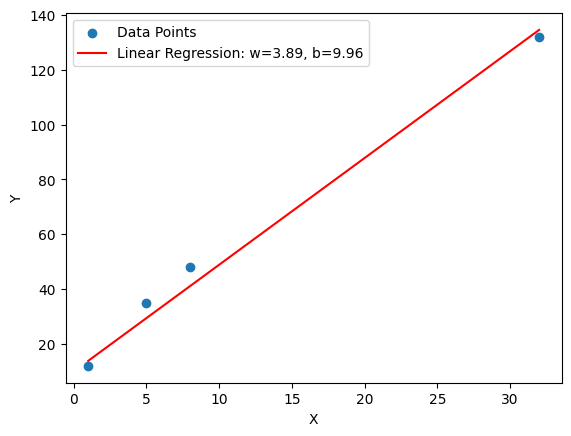

In [44]:
## x_train = np.array([1, 5, 8, 32])
y_train = np.array([12, 35, 48, 132])
iteration = 1_000
w = 10.0
b = 10.0
alpha = 1.0e-4
for _ in range (iteration):
    dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
    
    # Calculating the next value for our w and b:
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

# Plot the points
plt.scatter(x_train, y_train, label='Data Points')

# Plot the linear regression line
x_range = np.linspace(min(x_train), max(x_train), 100)
y_range = f_wb(w, b, x_range)
plt.plot(x_range, y_range, color='red', label=f'Linear Regression: w={w:.2f}, b={b:.2f}')

# Add labels and a legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()